# NASA Asteroid Prediction using ANN --Artificial Neural Nteworks
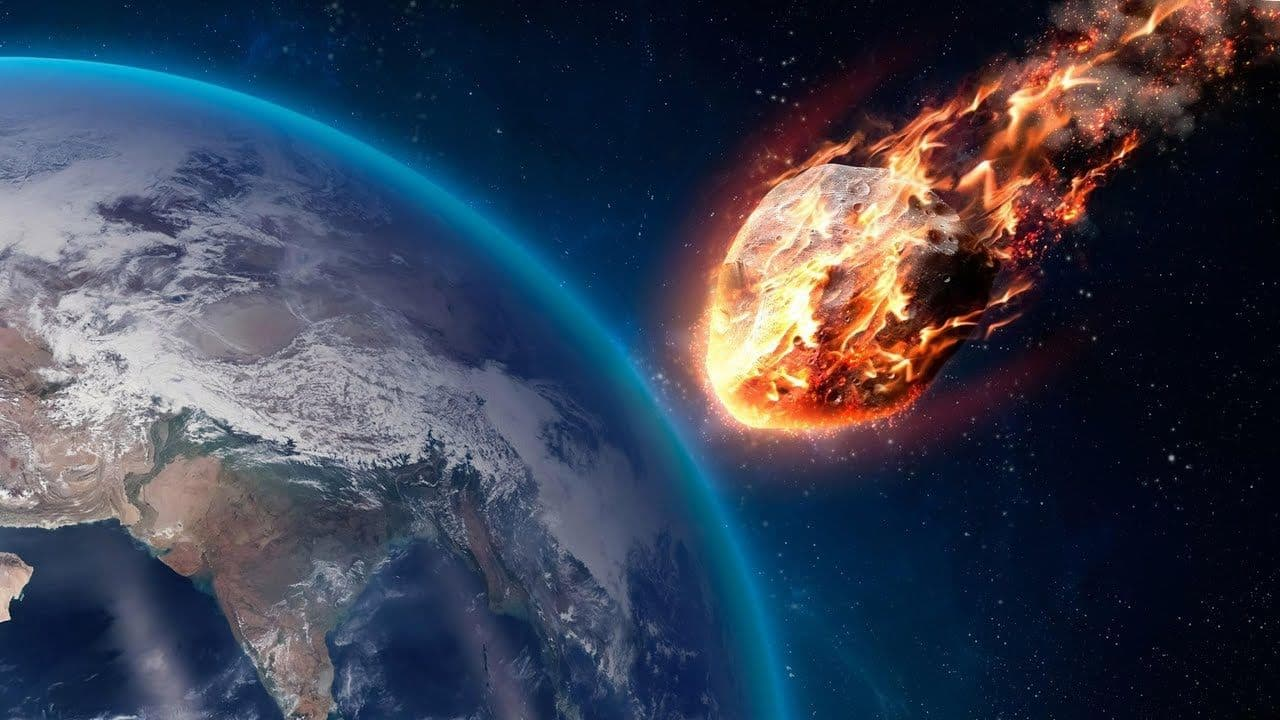

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('../input/nasaasteroidclassification/nasa.csv')
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
dataset.drop(['Neo Reference ID','Name','Close Approach Date','Equinox','Orbiting Body','Orbit Determination Date'],axis=1,inplace=True)
dataset = dataset.dropna()
dataset.Hazardous = dataset.Hazardous.astype(str)
dataset.Hazardous = dataset.Hazardous.replace({'true':1,'false':0})


In [4]:
dataset['Hazardous'] = dataset['Hazardous'].replace({'True':1,'False':0})

In [5]:
print('Number of features : ',dataset.shape[1])
print('Number of rows : ',dataset.shape[0])

Number of features :  34
Number of rows :  4687


In [6]:
X = dataset.iloc[:,0:33].values
y = dataset.iloc[:,33:34].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4687 entries, 0 to 4686
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Epoch Date Close Approach     4687 non-null   int64  
 10  Relative Velocity km per sec  4687 non-null   float64
 11  Relative Velocity km per hr   4687 non-null   float64
 12  Miles per hour                4687 non-null   float64
 13  Mis

In [8]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state = 10,test_size=0.30)

In [10]:
# Artificial Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#from keras.layers import 

In [12]:
regressor = Sequential()
regressor.add(Dense(64,input_shape = (33,),activation='relu',kernel_initializer='he_normal'))
regressor.add(Dense(64,activation='relu'))
regressor.add(Dropout(rate=0.10))
regressor.add(Dense(32,activation='relu'))
regressor.add(Dropout(rate=0.10))
regressor.add(Dense(1,activation='sigmoid'))
regressor.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [13]:
regressor.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
103/103 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.7556
Epoch 2/50
103/103 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8840
Epoch 3/50
103/103 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9150
Epoch 4/50
103/103 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9481
Epoch 5/50
103/103 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9520
Epoch 6/50
103/103 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9666
Epoch 7/50
103/103 [==============================] - 0s 2ms/step - loss: 0.0806 - accuracy: 0.9611
Epoch 8/50
103/103 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9748
Epoch 9/50
103/103 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9803
Epoch 10/50
103/103 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9800

In [14]:
pred = regressor.predict(X_test)

In [15]:
pred = (pred>0.5)

In [16]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
from sklearn.metrics import accuracy_score,classification_report
print('classification_report : ',accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

classification_report :  0.9829424307036247
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1177
        True       0.94      0.95      0.95       230

    accuracy                           0.98      1407
   macro avg       0.97      0.97      0.97      1407
weighted avg       0.98      0.98      0.98      1407



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
def build_model(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(64,input_shape = (33,),activation='relu',kernel_initializer='he_normal'))
    classifier.add(Dense(64,activation='relu'))
    classifier.add(Dropout(rate=0.10))
    classifier.add(Dense(32,activation='relu'))
    classifier.add(Dropout(rate=0.10))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = build_model,batch_size=32,epochs=100)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)

In [39]:
mean = accuracies.mean()
variance = accuracies.std()

In [40]:
print("Average Accuracy : ",mean)
print("Variance : ",variance)

Average Accuracy :  0.9786585509777069
Variance :  0.006817284580159544


In [41]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {
    'epochs':[100,200,500],
    'optimizer':['adam','rmseprop'],
    'batch_size':[25,32]
}

In [46]:
grid = GridSearchCV(estimator=classifier,param_grid = params,n_jobs=-1,cv=5)

In [47]:
grid.fit(X_train,y_train)

Epoch 1/100
103/103 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8399
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9037
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9318
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9531
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9592
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9696
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9697
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9784
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9797
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0495 - accura

103/103 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9991
Epoch 81/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9991
Epoch 82/100
103/103 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 83/100
103/103 [==============================] - 0s 2ms/step - loss: 6.2213e-04 - accuracy: 1.0000
Epoch 84/100
103/103 [==============================] - 0s 2ms/step - loss: 5.7156e-04 - accuracy: 1.0000
Epoch 85/100
103/103 [==============================] - 0s 2ms/step - loss: 7.0189e-04 - accuracy: 1.0000
Epoch 86/100
103/103 [==============================] - 0s 1ms/step - loss: 1.3701e-04 - accuracy: 1.0000
Epoch 87/100
103/103 [==============================] - 0s 2ms/step - loss: 3.5159e-04 - accuracy: 1.0000
Epoch 88/100
103/103 [==============================] - 0s 2ms/step - loss: 2.5149e-04 - accuracy: 1.0000
Epoch 89/100
103/103 [==============================] - 0s 1ms/step - l

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7facc81d3bd0>,
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [100, 200, 500],
                         'optimizer': ['adam', 'rmseprop']})

In [48]:
print('Best params : ',grid.best_params_)
print('Best score : ',grid.best_score_)

Best params :  {'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
Best score :  0.9771341562271119
